# IPL Ball-by-Ball: Quickstart Notebook

This notebook helps you load, explore, and visualize the IPL ball-by-ball dataset (`deliveries.csv`) and match-level dataset (`matches.csv`).

## How to use
1. Put `deliveries.csv` and `matches.csv` in the **same folder** as this notebook.
2. Run the cells **top to bottom**.
3. If files are missing, you'll be prompted to **upload** them (works in Google Colab).

### Works in:
- **Google Colab**: Upload this notebook, then `Runtime → Run all`.
- **Jupyter (Anaconda / VS Code)**: Open the notebook and run cells.

---
_Generated on: 2025-08-31T16:41:20.866168Z_

In [20]:
# Imports
# Standard libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # optional but useful for better plots

# Pandas display settings
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', 120)          # Wider display for big tables
pd.set_option('display.precision', 2)        # Round floats nicely

# Plotting style
plt.style.use('seaborn-v0_8')                # Cleaner plots
sns.set_palette("Set2")                      # Nice default color palette

# Figure size default
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Environment ready for IPL analysis")


✅ Environment ready for IPL analysis


In [21]:


# File names
DELIVERIES = "deliveries.csv"
MATCHES = "matches.csv"

def load_ipl_data(deliveries_file=DELIVERIES, matches_file=MATCHES):
    """
    Load IPL datasets (deliveries & matches).
    Works in both Jupyter Notebook (local) and Google Colab.
    """
    # Check if files exist locally
    if os.path.exists(deliveries_file) and os.path.exists(matches_file):
        print("📂 Loading local files...")
        deliveries = pd.read_csv(deliveries_file)
        matches = pd.read_csv(matches_file)
        return deliveries, matches

    # Try Google Colab upload
    try:
        from google.colab import files  # Only available in Colab
        print("⚠️ Files not found locally. Please upload deliveries.csv and matches.csv...")
        uploaded = files.upload()
        deliveries = pd.read_csv(deliveries_file)
        matches = pd.read_csv(matches_file)
        return deliveries, matches
    except ImportError:
        print("❌ Could not auto-trigger upload (not in Colab).")
        print("👉 Please place the CSV files in the same folder as this notebook.")
        return None, None

# --- Run this to load ---
deliveries, matches = load_ipl_data()

if deliveries is not None and matches is not None:
    print("✅ Files loaded successfully!")
    print("Deliveries shape:", deliveries.shape)
    print("Matches shape:", matches.shape)


📂 Loading local files...
✅ Files loaded successfully!
Deliveries shape: (260920, 17)
Matches shape: (1095, 20)


In [4]:
# Load data
deliveries = pd.read_csv(DELIVERIES)
matches = pd.read_csv(MATCHES)

print('deliveries shape:', deliveries.shape)
print('matches shape   :', matches.shape)
display(deliveries.head())
display(matches.head())

deliveries shape: (260920, 17)
matches shape   : (1095, 20)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


## Basic EDA

In [5]:
# Columns and nulls
display(pd.DataFrame({'col': deliveries.columns, 'nulls': deliveries.isna().sum().values}))
display(pd.DataFrame({'col': matches.columns, 'nulls': matches.isna().sum().values}))

,col,nulls
0,match_id,0
1,inning,0
2,batting_team,0
3,bowling_team,0
4,over,0
5,ball,0
6,batter,0
7,bowler,0
8,non_striker,0
9,batsman_runs,0


,col,nulls
0,id,0
1,season,0
2,city,51
3,date,0
4,match_type,0
5,player_of_match,5
6,venue,0
7,team1,0
8,team2,0
9,toss_winner,0


In [18]:
# Convert date column to datetime if present
if 'date' in matches.columns:
    try:
        matches['date'] = pd.to_datetime(matches['date'], errors='coerce')
    except Exception as e:
        print("Date conversion error:", e)

# Select common fields safely
common_cols = ['id','season','city','date','toss_winner','toss_decision','winner']
common = matches[[c for c in common_cols if c in matches.columns]].copy()

# Rename for merge compatibility
if 'id' in common.columns:
    common.rename(columns={'id': 'match_id'}, inplace=True)

# Merge deliveries with common match info
dlv = deliveries.merge(common, on='match_id', how='left')

# Preview merged dataset
print("Merged Data Shape:", dlv.shape)
print(dlv.head())


Merged Data Shape: (260920, 23)
   match_id  inning           batting_team                 bowling_team  over  ball       batter   bowler  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0     1   SC Ganguly  P Kumar   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0     2  BB McCullum  P Kumar   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0     3  BB McCullum  P Kumar   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0     4  BB McCullum  P Kumar   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0     5  BB McCullum  P Kumar   

   non_striker  batsman_runs  extra_runs  total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  \
0  BB McCullum             0           1           1     legbyes          0              NaN            NaN     NaN   
1   SC Ganguly             0           0           0         NaN          0

## Top Players & Teams

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

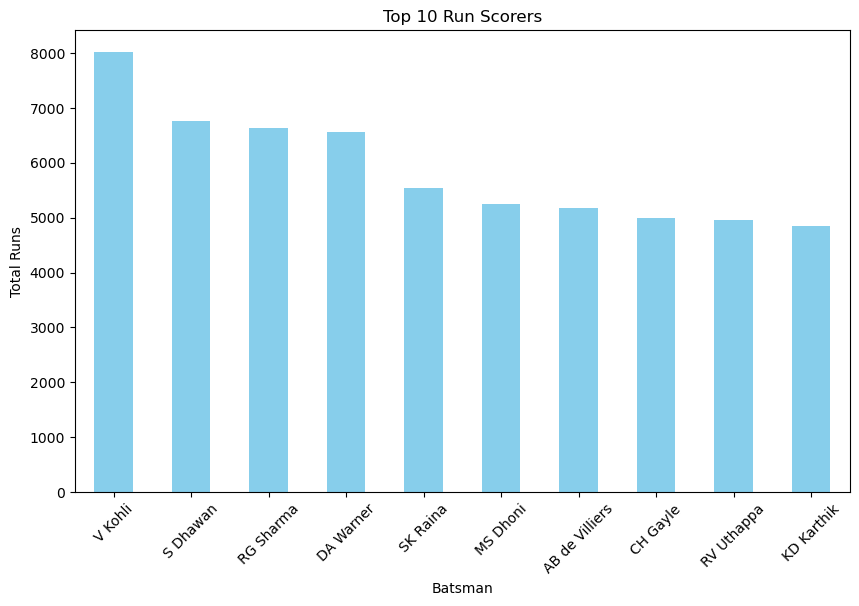

In [15]:
# Top 10 run scorers
batsman_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
display(batsman_runs)

# Plot
plt.figure(figsize=(10,6))
batsman_runs.plot(kind='bar', color='skyblue')
plt.title("Top 10 Run Scorers")
plt.ylabel("Total Runs")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.show()


bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
B Kumar       181
R Ashwin      181
SP Narine     180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: dismissal_kind, dtype: int64

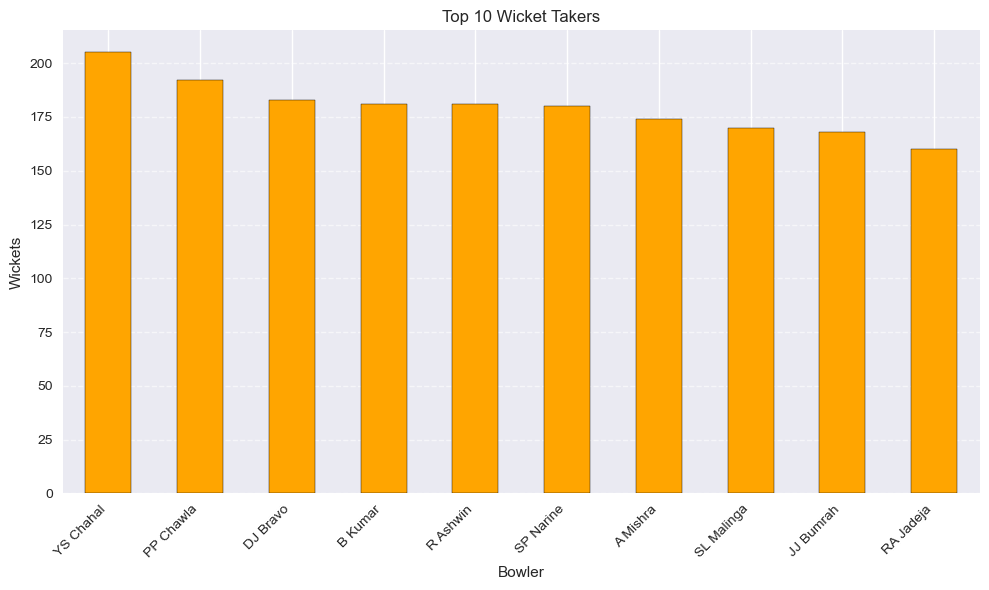

In [22]:
# Filter only actual wickets
wickets = deliveries[deliveries['dismissal_kind'].notna() & (deliveries['dismissal_kind'] != 'run out')]

# Count wickets per bowler
bowler_wickets = wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)

# Display table
display(bowler_wickets)

# Plot
plt.figure(figsize=(10,6))
bowler_wickets.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Wicket Takers')
plt.ylabel('Wickets')
plt.xlabel('Bowler')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Name: count, dtype: int64

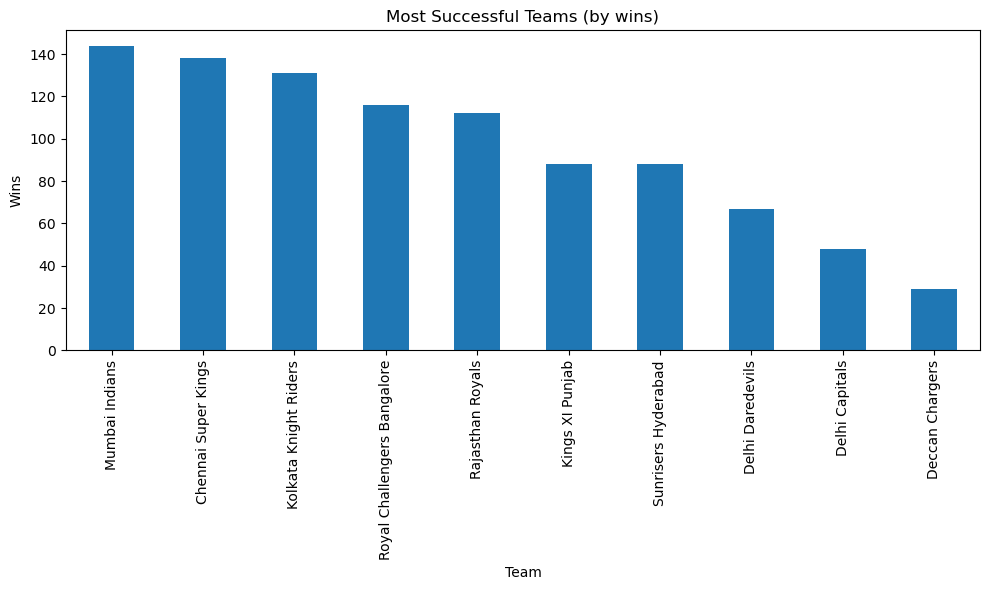

In [8]:
# Team wins
team_wins = matches['winner'].value_counts().head(10)
display(team_wins)

plt.figure(figsize=(10,6))
team_wins.plot(kind='bar')
plt.title('Most Successful Teams (by wins)')
plt.ylabel('Wins')
plt.xlabel('Team')
plt.tight_layout()
plt.show()

toss_decision
field    704
bat      391
Name: count, dtype: int64

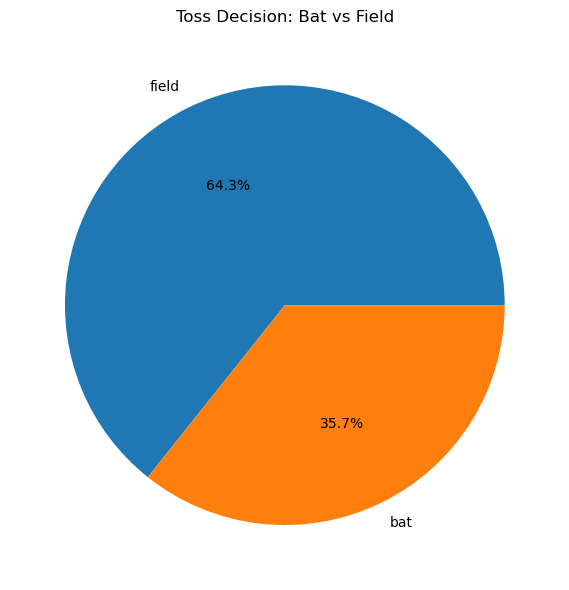

In [9]:
# Toss decision trends
if 'toss_decision' in matches.columns:
    toss_counts = matches['toss_decision'].value_counts()
    display(toss_counts)

    plt.figure(figsize=(6,6))
    toss_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Toss Decision: Bat vs Field')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print('toss_decision column not found in matches.csv')

## Bonus: Phases & Run Rates
- Powerplay: overs 1–6
- Middle: overs 7–15
- Death: overs 16–20

We'll compute overall run rate for each phase.

,match_id,inning,phase,balls,runs,overs,run_rate
0,335982,1,Death (16-20),24,64,4.000000,16.000000
1,335982,1,Middle (7-15),56,90,9.333333,9.642857
2,335982,1,Powerplay (1-6),44,68,7.333333,9.272727
3,335982,2,Middle (7-15),55,49,9.166667,5.345455
4,335982,2,Powerplay (1-6),46,33,7.666667,4.304348


phase
Death (16-20)      9.699548
Middle (7-15)      7.798285
Powerplay (1-6)    7.471024
Name: run_rate, dtype: float64

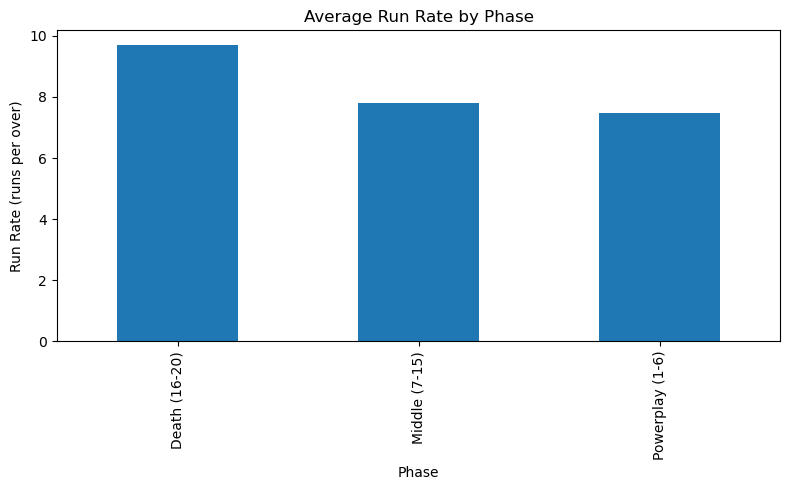

In [10]:
# Phase run rates per innings
def over_to_phase(o):
    if o <= 6:
        return 'Powerplay (1-6)'
    if o <= 15:
        return 'Middle (7-15)'
    return 'Death (16-20)'

if 'over' in deliveries.columns and 'total_runs' in deliveries.columns:
    tmp = deliveries.copy()
    tmp['phase'] = tmp['over'].apply(over_to_phase)
    phase_stats = tmp.groupby(['match_id','inning','phase']).agg(balls=('ball','count'), runs=('total_runs','sum')).reset_index()
    phase_stats['overs'] = phase_stats['balls'] / 6
    phase_stats['run_rate'] = phase_stats['runs'] / phase_stats['overs']
    display(phase_stats.head())

    mean_rr = phase_stats.groupby('phase')['run_rate'].mean().sort_values(ascending=False)
    display(mean_rr)

    plt.figure(figsize=(8,5))
    mean_rr.plot(kind='bar')
    plt.title('Average Run Rate by Phase')
    plt.ylabel('Run Rate (runs per over)')
    plt.xlabel('Phase')
    plt.tight_layout()
    plt.show()
else:
    print('Required columns not found for phase analysis (need over and total_runs).')

In [16]:
# Top 10 batsmen (batters) by total runs
batsman_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Top 10 bowlers by wickets
bowler_wickets = deliveries[deliveries['is_wicket'] == 1] \
    .groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

# Matches won by each team
team_wins = matches['winner'].value_counts().head(10)

# Save results to CSV
batsman_runs.to_csv('top_batsmen.csv')
bowler_wickets.to_csv('top_bowlers.csv')
team_wins.to_csv('team_wins.csv')
